In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/IE08-Ciência\ da\ Computação/Disciplinas/Periodo_09/icc220-top_bd/lab1_nlp
%ls

Mounted at /content/drive
/content/drive/MyDrive/IE08-Ciência da Computação/Disciplinas/Periodo_09/icc220-top_bd/lab1_nlp
'01.exe Exercicio Pre-processamento.ipynb'        stack.txt
'01.lab - Pré-processamento de texto NLP.ipynb'   testcases.txt


# Laboratório: Pré processamento de texto.

Antes de mais nada, é necessário baixar a NLTK

In [ ]:
#!pip install nltk
#!pip install seaborn
import nltk
from nltk.corpus import wordnet as wn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# nltk.download()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Neste notebook, iremos aprender um pouco sobre como usar a NLTK para pré-processar strings e fazer análise sintática automaticamente.

Isso vai fazer parte do nosso pipeline de processamento de linguagem natural, e subsidiar outras técnicas mais poderosas.

Uma coisa importante sobre NLP: Texto é o que se costuma chamar de "dados sujos", pois são criados manualmente por seres humanos e, como todos sabemos seres humanos são muito relaxados. O que quero dizer com isso? __Não se pode esperar regularidade de texto natural.__  Não se pode assumir que, por exemplo, no fim de cada frase haja um ponto, ou que as vírgulas serão utilizadas corretamente, por exemplo.

Desta forma, uma parte essencial do trabalho com texto é o pré-processamento.

![pipeline1.png](attachment:pipeline1.png)

Vamos ver um exemplo de arquivo para trabalharmos nesta aula:


In [ ]:
#from google.colab import files

#f1 = files.upload() #testcases.txt
#f2 = files.upload() #stack.txt


txt = open('testcases.txt', encoding='UTF-8').readlines()
txt2 = open('stack.txt', encoding='UTF-8').readlines()
#txt = open('testsClean.txt',encoding='UTF-8').read()
print(txt, txt2)

['1. All mandatory fields should be validated and indicated by an asterisk (*) symbol.\n', '2. Validation error messages should be displayed properly in the correct position.\n', '3. All error messages should be displayed in the same CSS style (For Example, using red color)\n', '4. General confirmation messages should be displayed using CSS style other than error messages style (For Example, using green color)\n', '5. Tooltips text should be meaningful.\n', '6. Drop-down fields should have the first entry as blank or text like ‘Select’.\n', '7. ‘Delete functionality’ for any record on a page should ask for a confirmation.\n', '8. Select/deselect all records option should be provided if page supports record add/delete/update functionality\n', '9. Amount values should be displayed with correct currency symbols.\n', '10. Default page sorting should be provided.\n', '11. Reset button functionality should set default values for all fields.\n', '12. All numeric values should be formatted pro

Como vocês podem ver, o arquivo está meio "sujo", contendo algumas linhas que são apenas títulos e com quase todas começando com um número e com um \n extra no final.

Agora quero que vocês desenferrugem o python _limpando_ este arquivo para ficar apenas casos os passos dos casos de teste.

In [ ]:
import re

pattern = re.compile('^\w')

resultados = [x.strip().split('. ')[-1] for x in txt if pattern.match(x)]

print(resultados)

['All mandatory fields should be validated and indicated by an asterisk (*) symbol.', 'Validation error messages should be displayed properly in the correct position.', 'All error messages should be displayed in the same CSS style (For Example, using red color)', 'General confirmation messages should be displayed using CSS style other than error messages style (For Example, using green color)', 'Tooltips text should be meaningful.', 'Drop-down fields should have the first entry as blank or text like ‘Select’.', '‘Delete functionality’ for any record on a page should ask for a confirmation.', 'Select/deselect all records option should be provided if page supports record add/delete/update functionality', 'Amount values should be displayed with correct currency symbols.', 'Default page sorting should be provided.', 'Reset button functionality should set default values for all fields.', 'All numeric values should be formatted properly.', 'Input values greater than the specified max limit s

Uma parte importante do trabalho com texto é __entender__ o mesmo. Para isto, usaremos diversas funções do NLTK.


In [ ]:
print("Total de linhas de casos de teste:", len(resultados))

txt_limpo = '\n'.join(resultados)
tokens = nltk.word_tokenize(txt_limpo)
text = nltk.Text(tokens)

Total de linhas de casos de teste: 201


Agora que temos os objetos tokens e text, os nossos casos de teste podem ser usados como um corpus. Com isto, podemos usar aprender melhor o contexto do texto. Por exemplo, podemos usar a função concordance para fazer busca por um termo e ver em quais contextos ele ocorre:

In [ ]:
text.concordance('password')

Displaying 6 of 6 matches:
d over an encrypted channel . Test password security and password policy enfor
annel . Test password security and password policy enforcement . Check applica
itted over a secured channel . The password should not be stored in cookies . 
ked while typing . Check if forgot password functionality is secured with feat
cured with features like temporary password expiry after specified hours and s
efore changing or requesting a new password . Verify CAPTCHA functionality . C


Podemos também descobrir quais palavras aparecem em contextos similares, com a função ``similar``, e em quais contextos duas ou mais palavras aparecem com a função ``common_context``:

In [ ]:
print(text.similar('email'))

browser
None


In [ ]:
print(text.common_contexts(['email','browser']))

the_address
None


Collocations são sequências de palavras que aparecem juntas com uma frequência incomum. _Cachorro quente_  é um termo muito mais comum do que _Quente cachorro_. A NLTK tem uma ferramenta para mostrar as colocações mais incomumente frequentes. Um exemplo para bigramas (pares de palavras):

In [ ]:
text.collocations()

Test Scenarios; image upload; result grid; filter criteria; Excel
file; error messages; special characters; make sure; resource keys;
Testing Test; email body; error message; child window; least one;
reports check; exported Excel; numeric fields; child windows; upload
functionality; showing reports


In [ ]:
# Para se saber quantas palavras unicas existem no texto, pode se colocar o mesmo em um set para retirar as repeticoes

unicas = set(text)

print("Total de palavras unicas:",len(unicas))

# quão variável são os assuntos na base de dados
print("Diversidade Lexica:", len(unicas)/len(text))

Total de palavras unicas: 652
Diversidade Lexica: 0.25883287018658196



Uma boa forma de entender um texto é gerando estatísticas sobre o mesmo. Uma das mais básicas é contar a frequência e distribuições em que os termos aparecem.

Para facilitar isso, o NLTK tem os métodos FreqDist e ConditionalFreqDisc (para quando temos múltiplas categorias de textos).

all mandatory fields should be validated and indicated by an asterisk symbol validation error messages should be displayed properly in the correct position all error messages should be displayed in the same css style for example using red color general confirmation messages should be displayed using css style other than error messages style for example using green color tooltips text should be meaningful fields should have the first entry as blank or text like select delete functionality for any record on a page should ask for a confirmation all records option should be provided if page supports record functionality amount values should be displayed with correct currency symbols default page sorting should be provided reset button functionality should set default values for all fields all numeric values should be formatted properly input values greater than the specified max limit should not be accepted or stored in the database check all input fields for special characters field accep

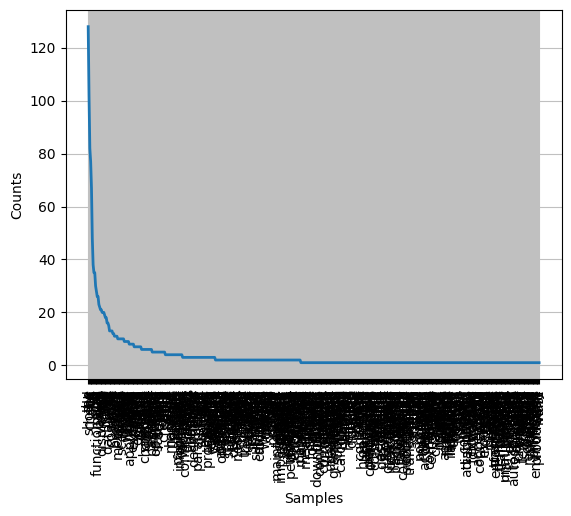

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
txt_alpha = ' '.join([t.lower() for t in text if t.isalpha()])
print(txt_alpha)

alphatk = nltk.word_tokenize(txt_alpha)
txt_alpha = nltk.Text(alphatk)

fd = nltk.FreqDist(txt_alpha)
print(fd)

fd.most_common(20)
fd.plot()

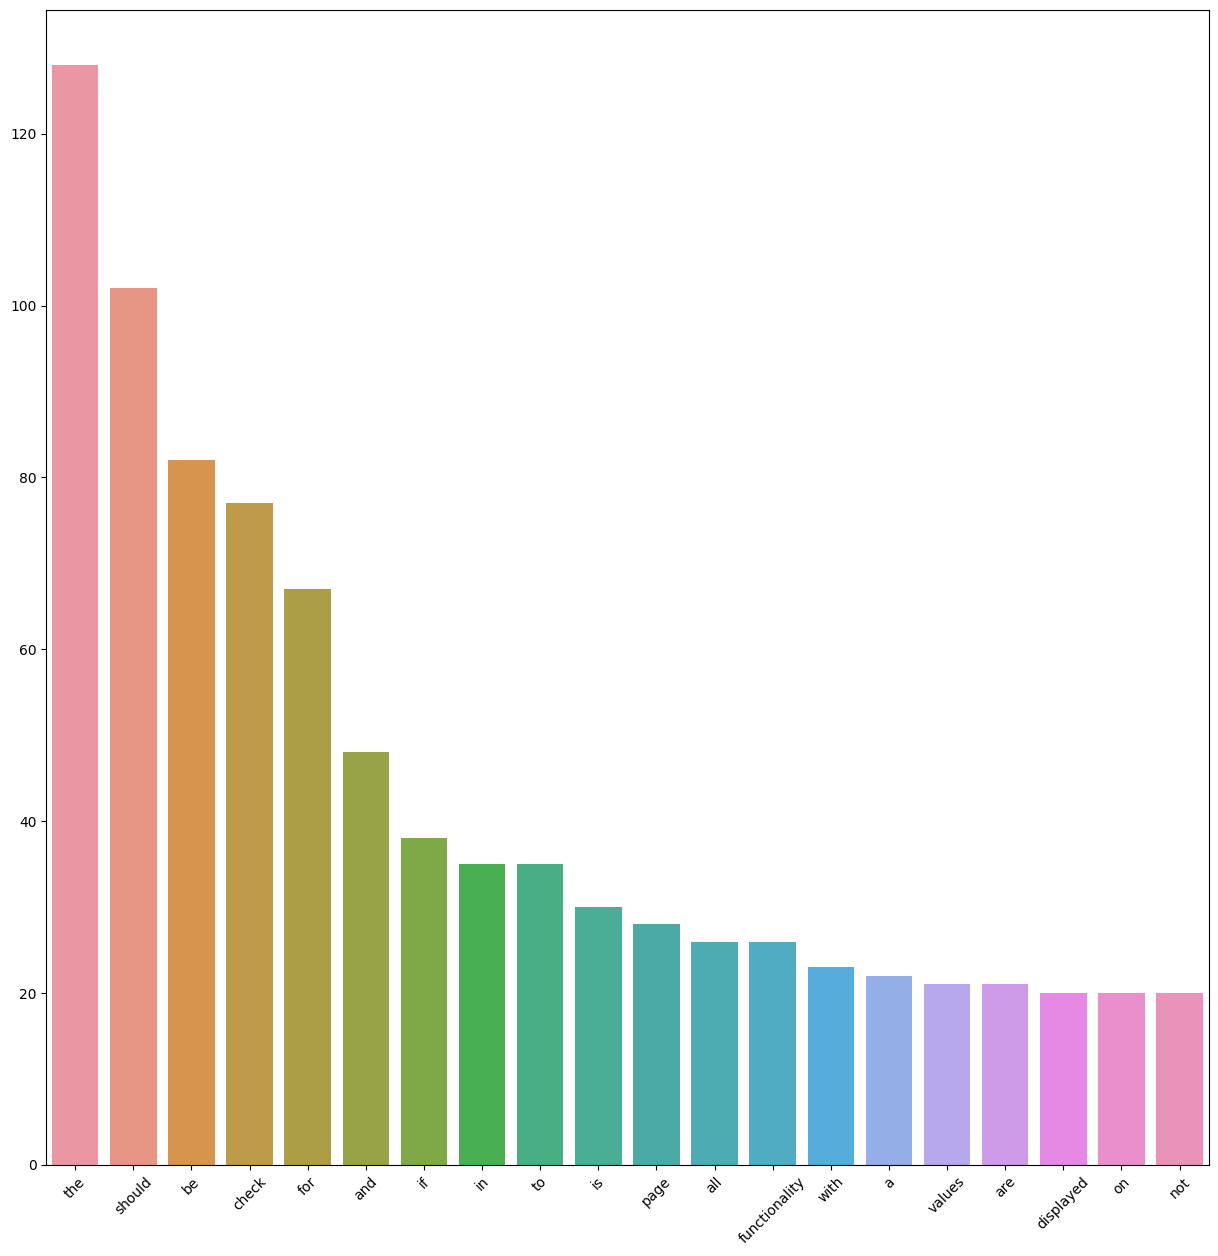

In [ ]:
nome, valor = zip(*fd.most_common(20))
fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(x=np.array(nome),y=np.array(valor),ax=ax)
plt.xticks(rotation=45)
plt.show()

## Stopwords


Um problema que persiste é o fato de que palavras muito comuns estão com frequência muito alta. Estas palavras que são "auxiliares na construção de frases são conhecidas como _stopwords_.

Podemos usar uma lista padrão do NLTK para identificar stopwords:

In [ ]:
text_sw = [t.lower() for t in text if not t.lower() in nltk.corpus.stopwords.words('english') and t.isalpha()]
text_sw

['mandatory',
 'fields',
 'validated',
 'indicated',
 'asterisk',
 'symbol',
 'validation',
 'error',
 'messages',
 'displayed',
 'properly',
 'correct',
 'position',
 'error',
 'messages',
 'displayed',
 'css',
 'style',
 'example',
 'using',
 'red',
 'color',
 'general',
 'confirmation',
 'messages',
 'displayed',
 'using',
 'css',
 'style',
 'error',
 'messages',
 'style',
 'example',
 'using',
 'green',
 'color',
 'tooltips',
 'text',
 'meaningful',
 'fields',
 'first',
 'entry',
 'blank',
 'text',
 'like',
 'select',
 'delete',
 'functionality',
 'record',
 'page',
 'ask',
 'confirmation',
 'records',
 'option',
 'provided',
 'page',
 'supports',
 'record',
 'functionality',
 'amount',
 'values',
 'displayed',
 'correct',
 'currency',
 'symbols',
 'default',
 'page',
 'sorting',
 'provided',
 'reset',
 'button',
 'functionality',
 'set',
 'default',
 'values',
 'fields',
 'numeric',
 'values',
 'formatted',
 'properly',
 'input',
 'values',
 'greater',
 'specified',
 'max',
 'limi

In [ ]:
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
len(text_sw)

1355

Altere o gráfico anterior para remover stopwords.

<FreqDist with 502 samples and 1355 outcomes>


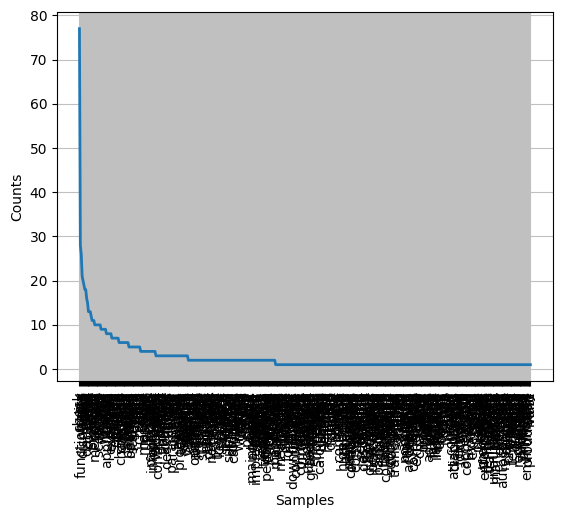

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fd = nltk.FreqDist(text_sw)
print(fd)

fd.most_common(20)
fd.plot()

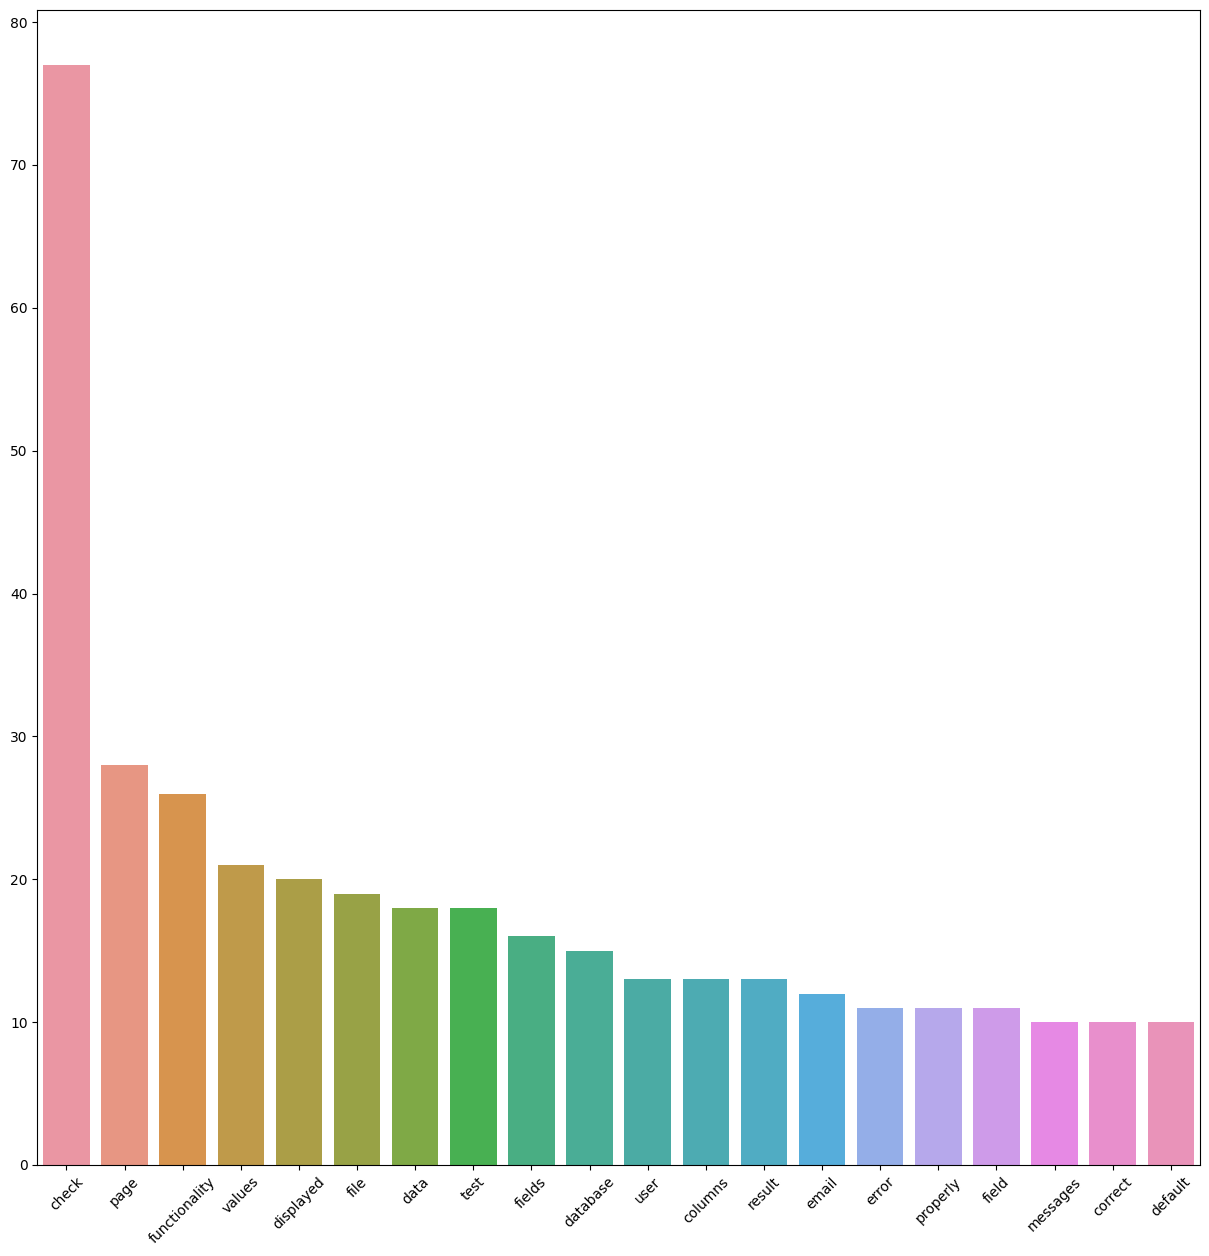

In [ ]:
nome, valor = zip(*fd.most_common(20))
fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(x=np.array(nome),y=np.array(valor),ax=ax)
plt.xticks(rotation=45)
plt.show()

## Palavras incomuns

Uma forma simples de identificar lixo é procurar por __palavras incomuns__. Uma forma simples pode ser simplesmente ignorar palavras com uma frequência menor q um limiar _t_, mas isto é mais funcional se seu corpus for grande. Outra forma é procurar por inconsistências, como muitas letras repetidas ou números misturados com palavras. Uma terceira forma é usando dicionários para identificar palavras incomuns, ou seja, palavras que _não_ estão no dicionário.

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
def incomuns(txt):
    vocab = set(t.lower() for t in txt if t.isalpha())
    dicio = set(t.lower() for t in nltk.corpus.words.words())
    estranhas = vocab - dicio
    return sorted(estranhas)

#pode precisar de um nltk.download('words')

incomuns(text)

['accepting',
 'addresses',
 'aligned',
 'allowed',
 'api',
 'asked',
 'attachments',
 'attacks',
 'autocomplete',
 'bcc',
 'bmp',
 'calculations',
 'captcha',
 'cases',
 'cc',
 'changed',
 'changing',
 'characters',
 'checkboxes',
 'clients',
 'closing',
 'coding',
 'columnname',
 'columns',
 'committed',
 'committing',
 'completed',
 'conditions',
 'config',
 'configurable',
 'connections',
 'contains',
 'conventions',
 'cookie',
 'cookies',
 'cpu',
 'created',
 'credentials',
 'css',
 'database',
 'db',
 'deleted',
 'dialog',
 'downloadable',
 'email',
 'emails',
 'enabled',
 'encrypted',
 'errors',
 'etc',
 'events',
 'exe',
 'exported',
 'exporting',
 'extensions',
 'failed',
 'features',
 'fields',
 'files',
 'firstname',
 'followed',
 'formatted',
 'formatting',
 'gets',
 'gmail',
 'greyed',
 'grids',
 'gui',
 'handing',
 'having',
 'highlighted',
 'hotmail',
 'hours',
 'html',
 'https',
 'images',
 'implemented',
 'indexes',
 'indicated',
 'info',
 'jpeg',
 'justified',
 'keys'

## Corrigindo erros de digitação

Em linguagem natural, é muito comum as palavras do texto terem um pouco de ruído, na forma de _erros de digitação_.

Uma forma de identificar palavras digitadas erradas pode ser usar um dicionário/white list de palavras corretas. Esta técnica é simples, mas pode identificar omo palavras termos mais exóticos como nomes próprios.

Outra forma é verificar a frequência das palavras em um corpus grande. Espera-se que palavras digitadas erroneamente tenham frequência muito menor do que a palavra digitada corretamente.

Mas como identificar a correta?

## Distância de Edição

Métricas de distância de edição servem para indicar com quantos passos você transforma uma string em outra. Ex:

`Distamca` -> `Distancia`: Duas edições (substituir o `m` por `n` e adicionar o `i`)

`Intenção` -> `Execução`: Cinco edições (remover o `I`, substituir `n` por `E`, `t` por `x`, inserir um `c` e substituir `n` por `u`)

Reparem que o segundo exemplo simplesmente substituiu a palavra.

Estas edições ficam mais fáceis de ver como alinhamentos.

A distância entre duas strings pode ser ponderada.

A distância de __Levenshtein__ (66) normalmente usa peso igual para inserção, deleção e substituição.

Contudo, ele propõe uma versão sem substituição (trocando as mesmas por uma deleção e uma inserção), o que na prática faz com que a substituição tenha peso 2.

Qual seria a distância de _Levenshtein_ entre Intenção e Execução com esse outro método?

## Distância de Edição mínima

Como encontrar a distância de edição mínima entre duas strings?

Um problema de busca no espaço de soluções pelo menor caminho de edições que satisfaz a mudança.

A quantidade de edições é imensa, então o espaço de busca é gigante. Contudo, conjuntos de edições diferentes muitas vezes podem levar ao mesmo estado (string).

Estes conjuntos repetidos não precisam ser recomputados se guardarmos em memória as soluções anteriores.

Parece familiar?

## Programação Dinâmica

Wagner e Fischer (1974). Gera uma matriz _simétrica_ de custos de transformar uma string em outra, incluindo um caracter de string vazia no começo.

A primeira linha/coluna contém os custos de partir de uma string vazia e inserir caracter por caracter até chegar na string alvo.

Resto é preenchido com:

$$ D[i,j] = \begin{cases} D[i-1,j]+custo_{del} \\ D[i,j-1]+custo_{ins} \\ D[i-1,j-1]+custo_{sub}\end{cases}$$

$$ D[i,j] = \begin{cases} D[i-1,j]+custo_{del} \\ D[i,j-1]+custo_{ins} \\ D[i-1,j-1]+custo_{sub}\end{cases}$$

![image.png](attachment:image.png)

In [ ]:
from nltk.metrics.distance import edit_distance

nltk.download('words')
from nltk.corpus import words
correct_words = words.words()

incorrect_words=['happpy', 'azmaing', 'intelliengt']

for word in incorrect_words:
    temp = [(edit_distance(word, w),w) for w in correct_words if w[0]==word[0]]
    print(sorted(temp, key = lambda val:val[0])[0][1])

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


happy
aiming
intelligent


Vamos fazer um código parecido, mas agora procurando as palavras incomuns da nossa base anterior com a atual:

## Distância de Jaccard

Baseada no coeficiente de Jaccard de similaridade: dadas duas strings `a` e `b` trata todos os n-gramas das strings como elementos de dois conjuntos $A$ e $B$, e calcula:

$$ J(A,B) = \frac{|A \cap B|}{|A \cup B|} $$

Com a distância sendo $ 1 - J(A,B) $

Isto pode ser aplicado tanto à sequências de tokens quanto de caracteres. Vamos ver como aplicar a pares de caracteres em palavras:

In [ ]:
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams


for word in incorrect_words:
    temp = [(jaccard_distance(set(ngrams(word, 2)),
                              set(ngrams(w, 2))),w)
            for w in correct_words if w[0]==word[0]]
    print(sorted(temp, key = lambda val:val[0])[0][1])

happy
amazing
intelligent


## Wordnet

A Wordnet é um dicionário de inglês orientado à semântica. Ele tem diversas ferramentas exploráveis como por exemplo uma ferramenta de sinônimos:

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

wn.synsets('application')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


[Synset('application.n.01'),
 Synset('application.n.02'),
 Synset('application.n.03'),
 Synset('application.n.04'),
 Synset('lotion.n.02'),
 Synset('application.n.06'),
 Synset('application.n.07')]

In [ ]:
wn.synset('application.n.03').lemma_names()

['application', 'coating', 'covering']

In [ ]:
wn.synset('browser.n.02').definition()

'a program used to view HTML documents'

In [ ]:
wn.synset('application.n.04').hyponyms()

[Synset('active_application.n.01'),
 Synset('applet.n.01'),
 Synset('browser.n.02'),
 Synset('editor_program.n.01'),
 Synset('frame.n.06'),
 Synset('job.n.11'),
 Synset('natural_language_processor.n.01'),
 Synset('word_processor.n.01')]

In [ ]:
wn.synset('application.n.04').hypernyms()

[Synset('program.n.07')]

In [ ]:
wn.lemma('application.n.04.application').antonyms()

[]

Tentem descobrir o synset para program no sentido de programa de computador.

In [ ]:
wn.synsets('program')

[Synset('plan.n.01'),
 Synset('program.n.02'),
 Synset('broadcast.n.02'),
 Synset('platform.n.02'),
 Synset('program.n.05'),
 Synset('course_of_study.n.01'),
 Synset('program.n.07'),
 Synset('program.n.08'),
 Synset('program.v.01'),
 Synset('program.v.02')]

Uma outra utilidade é descobrir a similaridade entre conceitos através dos seus synset:

In [ ]:
wn.synset('application.n.04').wup_similarity(wn.synset('program.n.07'))

0.9473684210526315

Na prática, a wordnet é uma hierarquia de palavras, indo de conceitos mais genéricos até os mais específicos. Não irei me alongar hoje, mas quero que lembrem disso pois pode ser útil no futuro.